In [1]:
%matplotlib inline

import os
from IPython.display import display

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
(X, y) = load_breast_cancer(return_X_y=True)
X=pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, random_state=0)

In [3]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred)/X.shape[1]))
print('X.shape[1]: %d' % X.shape[1])

Accuracy: 0.97
Accuracy per feature: 0.03
X.shape[1]: 30


 1) 27                             0.143009
 2) 7                              0.135889
 3) 22                             0.097820
 4) 20                             0.093731
 5) 6                              0.077138
 6) 23                             0.068981
 7) 26                             0.043254
 8) 2                              0.037805
 9) 0                              0.035690
10) 3                              0.034588
11) 13                             0.032326
12) 28                             0.021047
13) 21                             0.020223
14) 1                              0.018403
15) 25                             0.018203
16) 5                              0.015951
17) 10                             0.015562
18) 24                             0.014261
19) 12                             0.009921
20) 29                             0.009572
21) 16                             0.008244
22) 19                             0.006656
23) 17                          

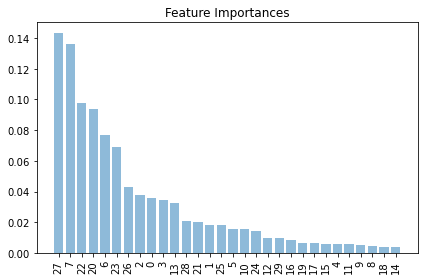

In [4]:
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.savefig('./output/fig-forest-feature-importances.png', dpi=300)
plt.show()

In [5]:
#leave only first 2 pc, and then train it again
X=X.drop(columns=[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29])

#test size changed from 0.3 to 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, random_state=0)

In [6]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred)/X.shape[1]))


Accuracy: 0.91
Accuracy per feature: 0.45
